In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

O que este notebook ira realizar:
---------------------------------

1. Analise dos resultados dos notebooks anteriores retirados do site da OLX (5000 registros de casas à venda em SP)

In [3]:
df = pd.read_excel('lat_lng.xlsx')

In [4]:
df = df[['municipio', 'categoria', 'preco']]

In [5]:
df['categoria'] = df.categoria.astype('category')

In [6]:
df['categoria'] = df['categoria'].str.replace('- Anúncio Profissional', '- Profissional')
df['categoria'] = df['categoria'].str.replace('Profissional', '- Profissional')

In [7]:
df['categoria'], df['profissional'] = df['categoria'].str.split('-', 1).str

In [8]:
df.groupby(['categoria'])['preco'].count()

categoria
Aluguel de quartos               68
Apartamentos                   2462
Casas                          1477
Indústria e comércio            743
Lançamentos                       6
Temporada                        36
Terrenos, sítios e fazendas     208
Name: preco, dtype: int64

In [9]:
df.categoria.unique()

array(['Apartamentos', 'Casas', 'Indústria e comércio', 'Temporada',
       'Terrenos, sítios e fazendas', 'Aluguel de quartos', 'Lançamentos'], dtype=object)

In [10]:
df['profissional']=df.profissional.replace('- Profissional', 'S')

In [11]:
df['profissional']=df.profissional.fillna('N')

In [12]:
df.head(15)

,municipio,categoria,preco,profissional
0,Belenzinho,Apartamentos,660000,N
1,Belenzinho,Apartamentos,850000,N
2,Mooca,Apartamentos,2000,N
3,Vila Bertioga,Casas,4000,N
4,Vila Independência,Indústria e comércio,35000,N
5,Mooca,Casas,1300,- Profissional
6,Vila Formosa,Apartamentos,400000,- Profissional
7,Alto da Mooca,Indústria e comércio,18000,N
8,Mooca,Apartamentos,899000,- Profissional
9,Vila Carrão,Indústria e comércio,284000,- Profissional


In [13]:
df_casa = df[df['categoria'] == 'Casas']

df_casa = df_casa.reset_index()

df_casa = df_casa[['municipio', 'preco']]

In [58]:
#cria um data frame com a soma dos precos dos municipios
df_soma = df_casa.groupby(['municipio'], as_index=False)['preco'].sum()
df_soma = df_soma.sort_values(by='preco',ascending=False)
df_soma = df_soma.reset_index(drop='index')

In [59]:
df_media = df_casa.groupby(['municipio'], as_index=False)['preco'].mean()
df_media = df_media.sort_values(by='preco',ascending=False)
df_media = df_media.reset_index(drop='index')

In [60]:
df_soma_dez=df_soma.head(10)

In [61]:
df_media_dez=df_media.head(10)

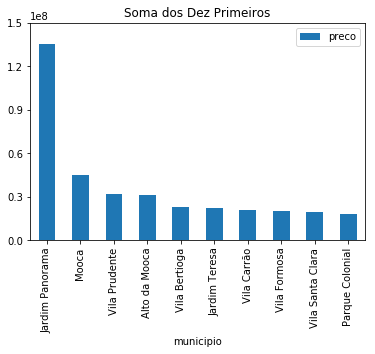

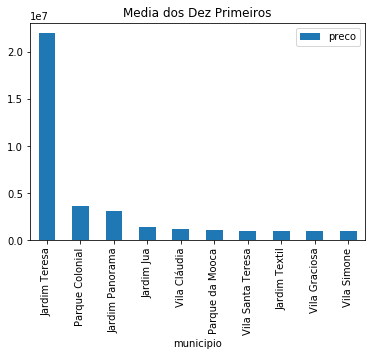

In [138]:
df_soma_dez.plot.bar(x=df_soma_dez['municipio'],title='Soma dos Dez Primeiros', yticks=np.linspace(0,float("1.5e8"), num=6))
df_media_dez.plot.bar(x=df_media_dez['municipio'],title='Media dos Dez Primeiros', yticks=np.linspace(0,float("2e7"), num=5))